Yale Hackathon

1 (c) Part One (There is a 2nd part, please look at that as well!)

In [408]:
import dynamiqs as dq
from functions_library import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

Load the file and extract the 2D array of the Wigner function

In [409]:
fock_exp = np.load("/Users/shilpishah/Downloads/mover/code/yq25_alice-bob_challenge_braket_bros/1_fock_rho.npy") # change the file name based on desired file

Create an ideal Fock state based on the experimental Fock state

In [410]:
fock_perf = dq.fock(fock_exp.shape[0],1)

Transform the ideal Fock state (currently in the form of a ket vector) to a square density matrix to be able to calculate fidelity values

In [411]:
fock_perf_dm = dq.todm(fock_perf)
print(fock_perf_dm)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


Gaussian noise has a Gaussian (normal) distribution. We use sigma = 0.1 as an arbitrary value as it is the most common standard deviation for Gaussian distributions.

In [412]:
def add_gaussian_noise(fock_exp, sigma=0.1):
    noise = np.random.normal(0, sigma, fock_exp.shape)
    wigner_noisy = fock_exp + noise
    print(wigner_noisy)
    return wigner_noisy

wigner_noisy = add_gaussian_noise(fock_exp, sigma=0.1)
print(wigner_noisy)

[[ 0.01309949-4.39047211e-19j -0.06271869-1.06679077e-02j
   0.09580347-1.35532895e-03j  0.01034982-1.23723518e-03j
   0.03627143-7.49684605e-04j  0.08317077+1.23533129e-03j
  -0.24678766+7.61577366e-04j]
 [-0.19106111+1.06679077e-02j  1.04445973+9.24489340e-19j
  -0.05025914+5.38965763e-02j  0.13320293+2.82955347e-02j
   0.07721222+2.78353936e-02j -0.27232392-3.62019846e-02j
   0.04194444-2.34313727e-02j]
 [-0.01834542+1.35532895e-03j  0.11733587-5.38965763e-02j
   0.13464556-7.73241613e-19j -0.05169596-3.88202561e-03j
  -0.01777242-7.42112223e-04j  0.07966188+2.91400453e-03j
   0.06775572+9.84151067e-04j]
 [-0.21994626+1.23723518e-03j  0.11557764-2.82955347e-02j
   0.09662605+3.88202561e-03j  0.00639201+1.01988278e-18j
  -0.02918396+1.07303817e-03j -0.05627293-1.55740726e-03j
   0.01714642-2.19129089e-03j]
 [ 0.04735678+7.49684605e-04j  0.015877  -2.78353936e-02j
   0.00398583+7.42112223e-04j  0.00471031-1.07303817e-03j
   0.2064276 -1.14333446e-18j  0.04013048+2.52862089e-04j
   0.0

Calculate the fidelity value between the experimental and perfect Fock state

In [413]:
dq.fidelity(fock_exp, fock_perf)

Array(0.960692, dtype=float32)

Create a plot to show the relationship between the fidelity levels and noise levels

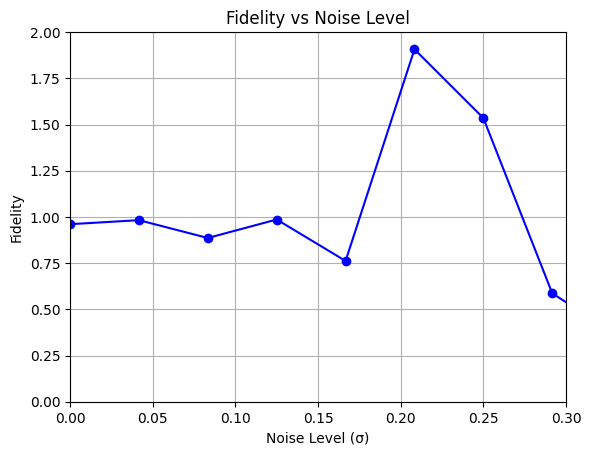

In [414]:
# Define noise levels
noise_levels = np.linspace(0, 1, 25) 
fidelity_values = []

# Compute fidelity for each noise level
for sigma in noise_levels:
    # Add Gaussian noise to fock_exp
    fock_exp_noisy = fock_exp + np.random.normal(0, sigma, fock_exp.shape)
    
    # Normalize the noisy fock_exp
    trace = np.trace(fock_exp_noisy)
    if trace != 1:
        fock_exp_noisy = fock_exp_noisy / trace

    # Compute fidelity between noisy fock_exp and fock_perf_dm
    fidelity = dq.fidelity(fock_exp_noisy, fock_perf_dm)
    fidelity_values.append(fidelity)

# Plot fidelity vs. noise level
plt.plot(noise_levels, fidelity_values, marker='o', color='blue')
plt.title("Fidelity vs Noise Level")
plt.xlabel("Noise Level (σ)")
plt.xlim(0, 0.3)
plt.ylabel("Fidelity")
plt.ylim(0, 2)  # Fidelity values are between 0 and 1, slightly off due to noise levels
plt.grid(True)
plt.show()

Function without noise (display produced from helper file)

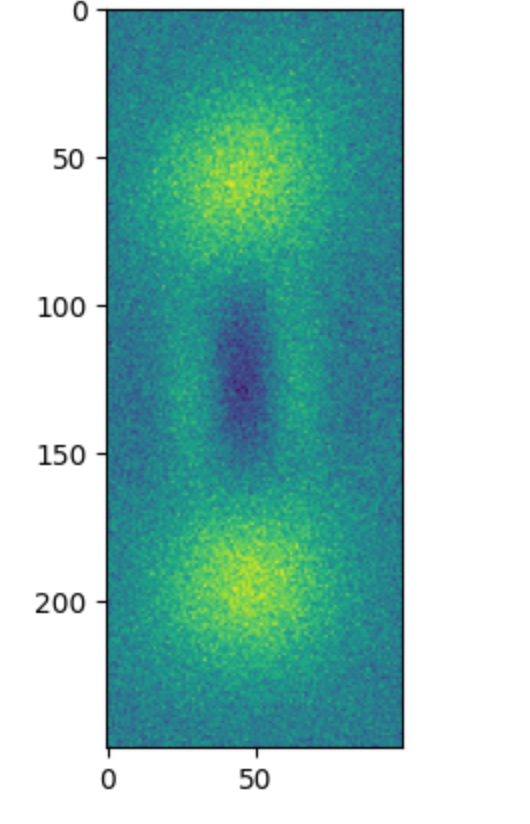

Function with noise (display produced from helper file)

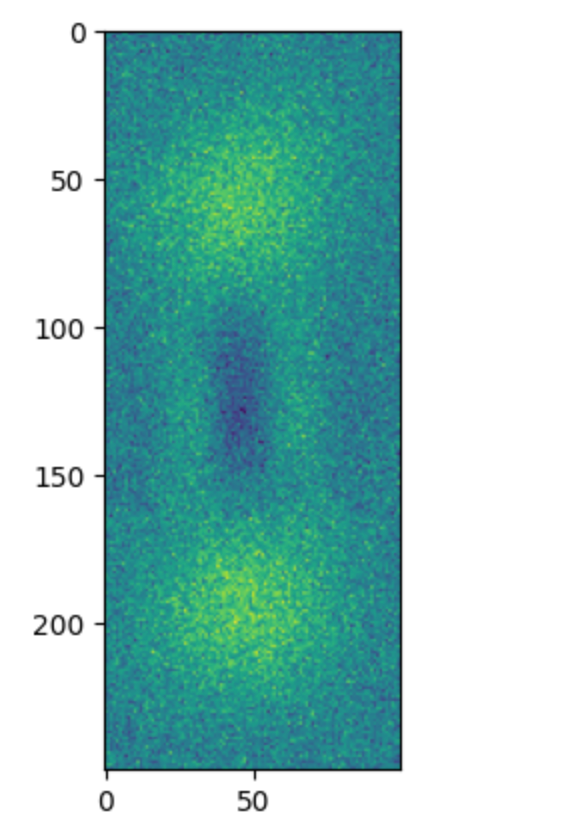